# [Hotdog or not-hotdog]()
Klasyfikacja binarna - weryfikacja na zdjęciu znajduje się hotdog

In [2]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

TensorFlow version: 2.10.0
Keras version: 2.10.0


In [3]:
# lists to store models results 
models_acc = []
models_val_acc = []
models_loss = []
models_val_loss = [] 

In [59]:
# The path to store trained models
models_dir = r'C:/Users/kuba2/Desktop/notebooks/neural_networks/lab02/hot-dog/models/' 
if not os.path.exists(models_dir):
    os.mkdir(models_dir)

# The directory where we will store our dataset
base_dir = r'C:/Users/kuba2/Desktop/notebooks/neural_networks/lab02/hot-dog/hotdog-nothotdog'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training hotdog pictures
train_cats_dir = os.path.join(train_dir, 'hotdog')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training nothotdog pictures
train_dogs_dir = os.path.join(train_dir, 'nothotdog')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation hotdog pictures
validation_cats_dir = os.path.join(validation_dir, 'hotdog')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation nothotdog pictures
validation_dogs_dir = os.path.join(validation_dir, 'nothotdog')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation hotdog pictures
test_cats_dir = os.path.join(test_dir, 'hotdog')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation nothotdog pictures
test_dogs_dir = os.path.join(test_dir, 'nothotdog')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

## <a href="https://keras.io/api/preprocessing/image/">Wstępne przetwarzanie danych</a>


In [5]:
img_rows = 299
img_cols = 299

In [60]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    # This is the target directory
    test_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    # This is the target directory
    validation_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2500 images belonging to 2 classes.
Found 644 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Budowanie modelu CNN


In [13]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 128)     

In [18]:
import tensorflow
from tensorflow.keras.optimizers import RMSprop

In [19]:
model1.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [20]:
history1 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=35)

Epoch 1/20
100/100 [==============================] - 22s 202ms/step - loss: 0.6608 - acc: 0.6050 - val_loss: 0.7123 - val_acc: 0.5314
Epoch 2/20
100/100 [==============================] - 20s 203ms/step - loss: 0.6057 - acc: 0.6834 - val_loss: 0.8571 - val_acc: 0.4643
Epoch 3/20
100/100 [==============================] - 20s 201ms/step - loss: 0.5838 - acc: 0.7020 - val_loss: 0.8081 - val_acc: 0.5029
Epoch 4/20
100/100 [==============================] - 20s 201ms/step - loss: 0.5713 - acc: 0.7030 - val_loss: 0.7058 - val_acc: 0.5886
Epoch 5/20
100/100 [==============================] - 20s 201ms/step - loss: 0.5509 - acc: 0.7246 - val_loss: 0.7997 - val_acc: 0.5400
Epoch 6/20
100/100 [==============================] - 20s 204ms/step - loss: 0.5322 - acc: 0.7442 - val_loss: 0.6526 - val_acc: 0.6214
Epoch 7/20
100/100 [==============================] - 20s 202ms/step - loss: 0.5177 - acc: 0.7482 - val_loss: 0.6525 - val_acc: 0.5929
Epoch 8/20
100/100 [==============================] - 2

#### Metody do wizualizacji

In [21]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 640x480 with 0 Axes>

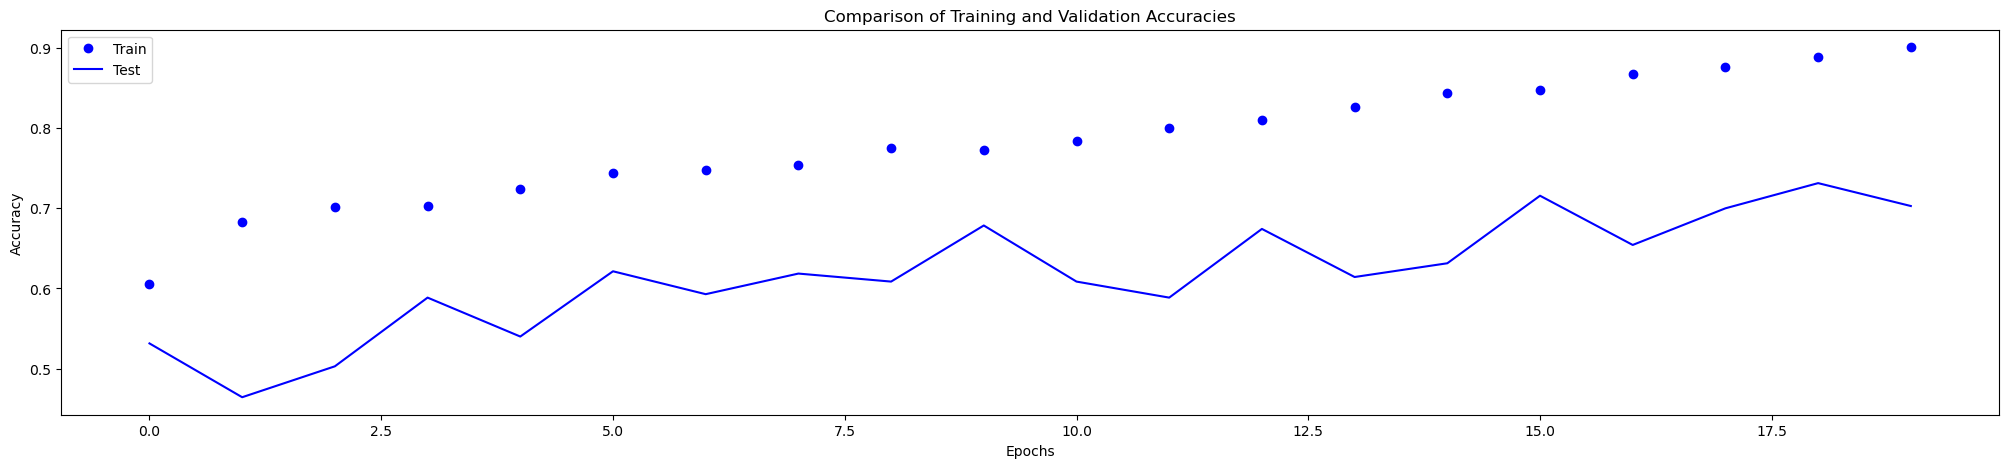

<Figure size 640x480 with 0 Axes>

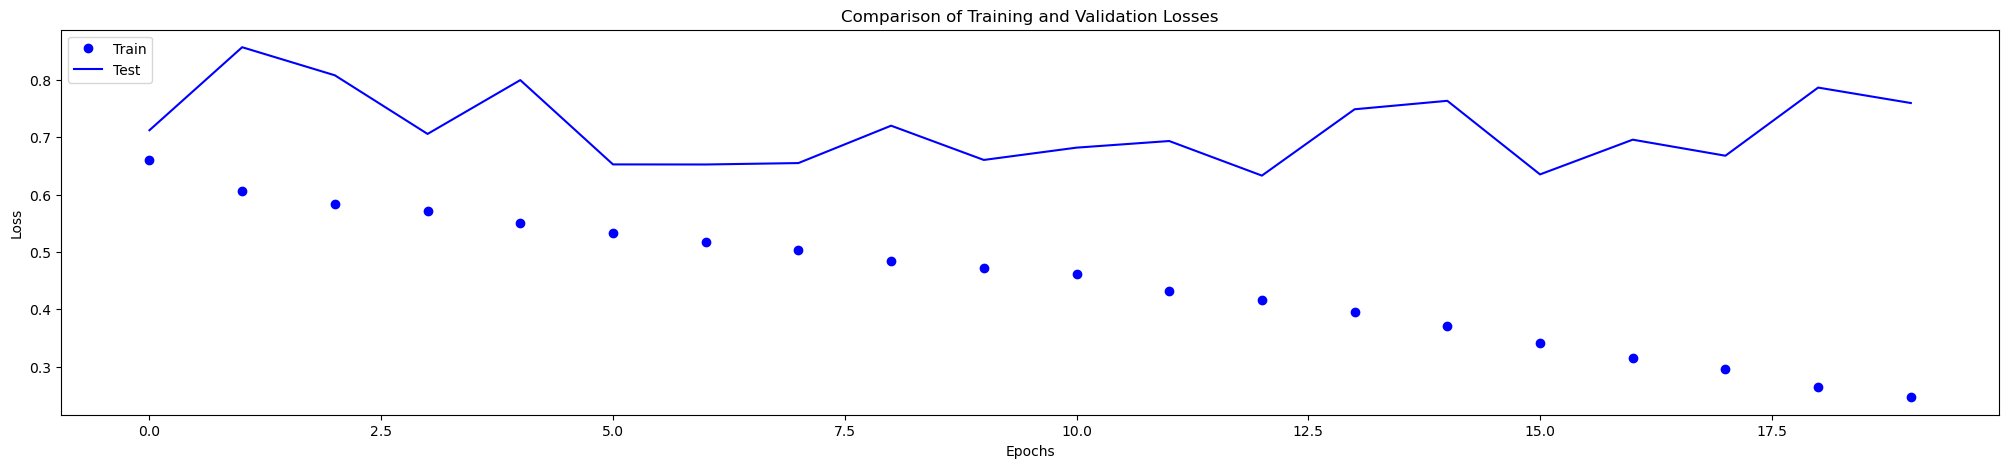

In [22]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

models_acc.append(acc1)
models_val_acc.append(val_acc1)
models_loss.append(loss1)
models_val_loss.append(val_loss1)

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')
PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

#### Ewaluacja modelu na zbiorze testowym

In [28]:
result1 = model1.evaluate(test_generator)
dict(zip(model1.metrics_names, result1))

33/33 [==============================] - 3s 76ms/step - loss: 0.8000 - acc: 0.7050


{'loss': 0.8000297546386719, 'acc': 0.7049689292907715}

In [32]:
model1.save(models_dir + 'hotdog_nothotdog_1.h5')

### Augmentacja danych

In [61]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2500 images belonging to 2 classes.


### Nauka po augmentacji danych treningowych

In [39]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 148, 148, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 35, 35, 128)     

In [41]:
model1.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [42]:
# Learning on the augmented data
history1 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=35)

Epoch 1/20
100/100 [==============================] - 48s 466ms/step - loss: 0.6757 - acc: 0.5869 - val_loss: 0.6423 - val_acc: 0.6229
Epoch 2/20
100/100 [==============================] - 46s 455ms/step - loss: 0.6291 - acc: 0.6558 - val_loss: 0.6946 - val_acc: 0.5543
Epoch 3/20
100/100 [==============================] - 45s 444ms/step - loss: 0.6132 - acc: 0.6839 - val_loss: 0.6924 - val_acc: 0.6157
Epoch 4/20
100/100 [==============================] - 45s 445ms/step - loss: 0.6062 - acc: 0.6839 - val_loss: 0.6956 - val_acc: 0.5886
Epoch 5/20
100/100 [==============================] - 53s 530ms/step - loss: 0.5912 - acc: 0.6879 - val_loss: 0.7780 - val_acc: 0.5429
Epoch 6/20
100/100 [==============================] - 46s 461ms/step - loss: 0.5861 - acc: 0.7020 - val_loss: 0.7064 - val_acc: 0.6129
Epoch 7/20
100/100 [==============================] - 48s 484ms/step - loss: 0.5774 - acc: 0.7085 - val_loss: 0.7501 - val_acc: 0.5314
Epoch 8/20
100/100 [==============================] - 5

<Figure size 640x480 with 0 Axes>

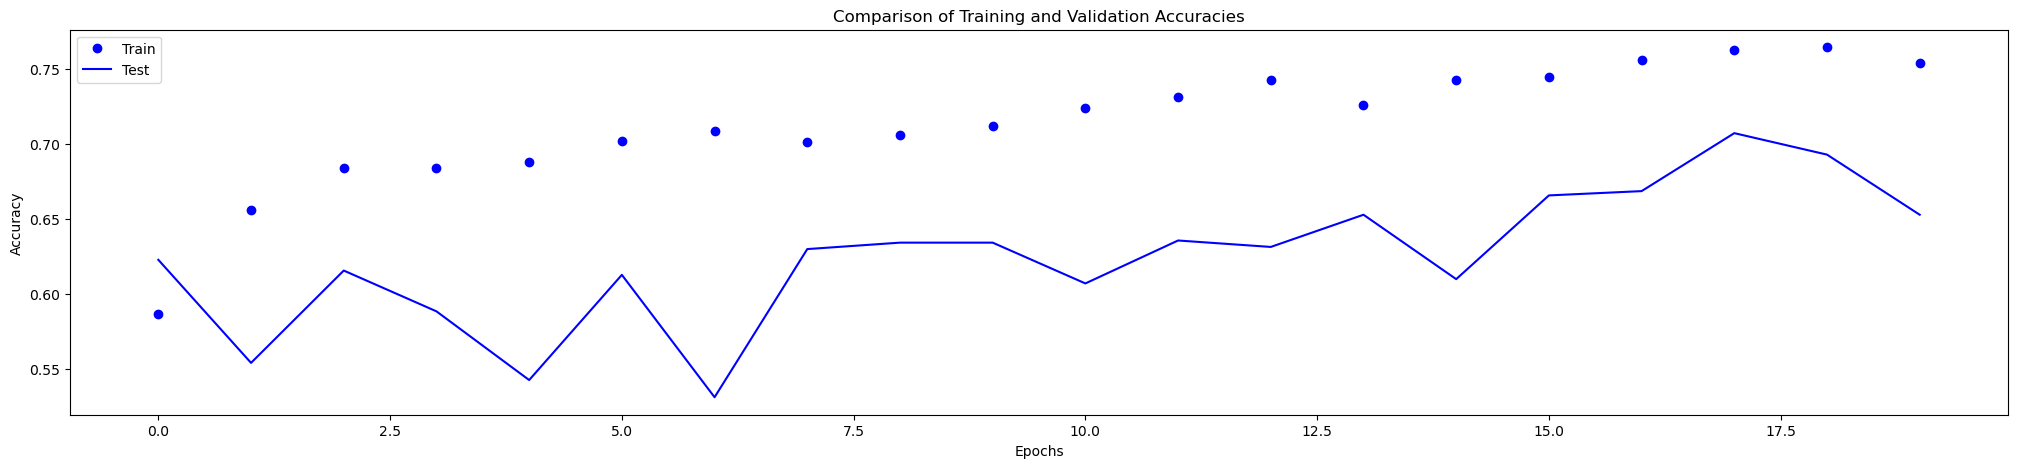

<Figure size 640x480 with 0 Axes>

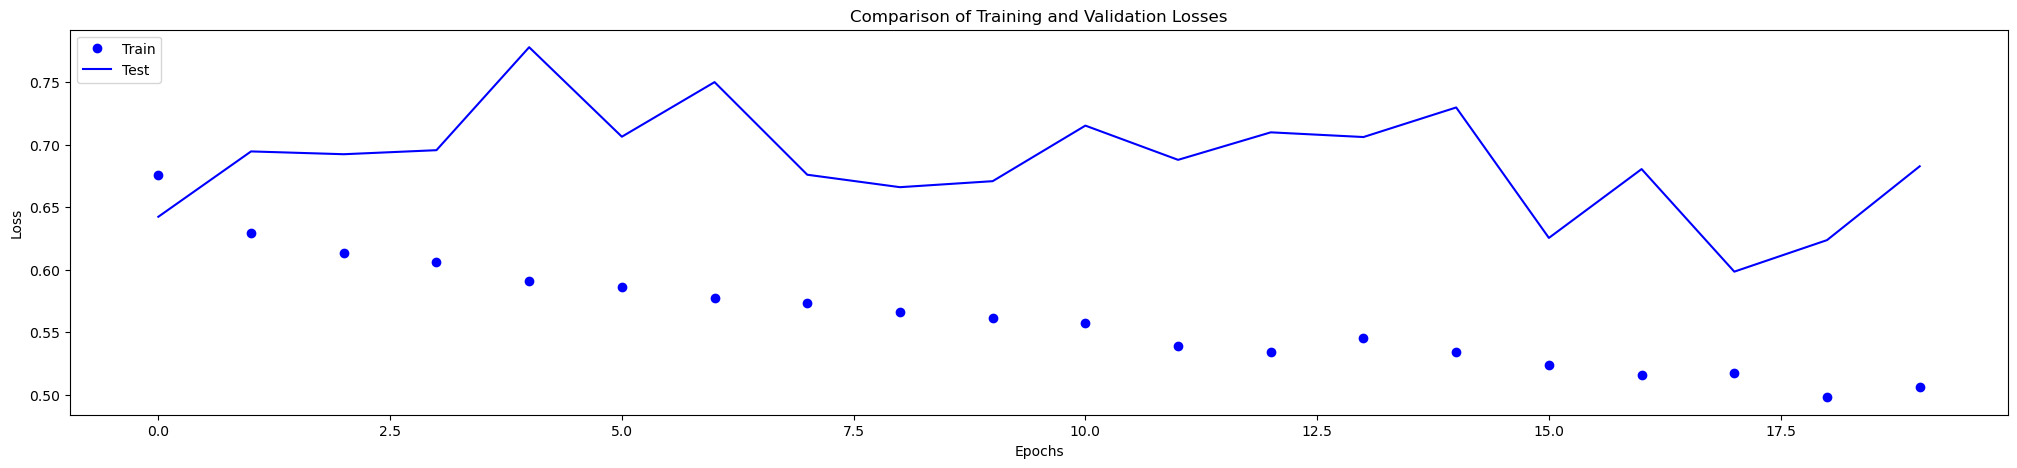

In [43]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

models_acc.append(acc1)
models_val_acc.append(val_acc1)
models_loss.append(loss1)
models_val_loss.append(val_loss1)

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')
PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

#### Metody do wizualizacji `accuracy` oraz `loss` dla wielu modelów

In [51]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
def PlotMultipleAccuracyComparison(accs ,val_accs, epoch_limit=30):
    plt.clf()   # clear figure
    plt.figure(figsize=(25,5))
    #acc = history1_dict['accuracy']
    #val_acc = history1_dict['val_accuracy']
    epochs = range(epoch_limit)
    print('accs len:', len(accs[0]))
    print('epochs:', epochs)
    for i,  (acc, val_acc, color) in enumerate(zip(accs, val_accs, colors)):
            limit = min(len(epochs), len(acc))
            plt.plot(epochs[:limit], acc[:limit], f'{color}o', label=f'Training accuracy of model {i+1}')
            plt.plot(epochs[:limit], val_acc[:limit], f'{color}', label=f'Validation accuracy of model {i+1}')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def PlotMultipleLossComparison(losses, val_losses, epoch_limit=30):
    plt.clf()   # clear figure
    plt.figure(figsize=(25,5))
    epochs = range(epoch_limit)
    for i,  (loss, val_loss, color) in enumerate(zip(losses, val_losses, colors)):
        limit = min(len(epochs), len(loss))
        plt.plot(epochs[:limit], loss[:limit], f'{color}o', label=f'Training loss of model {i+1}')
        plt.plot(epochs[:limit], val_loss[:limit], f'{color}', label=f'Validation loss of model {i+1}')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

accs len: 20
epochs: range(0, 20)


<Figure size 640x480 with 0 Axes>

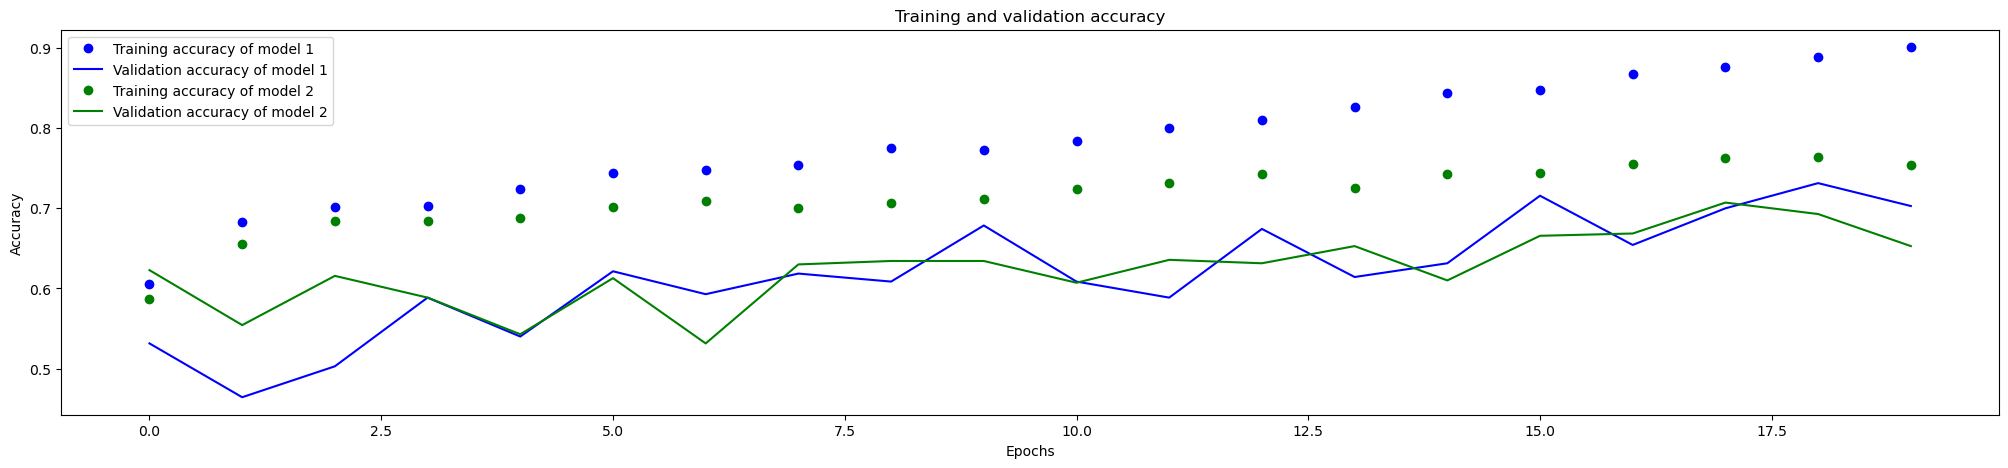

In [53]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=20)

<Figure size 640x480 with 0 Axes>

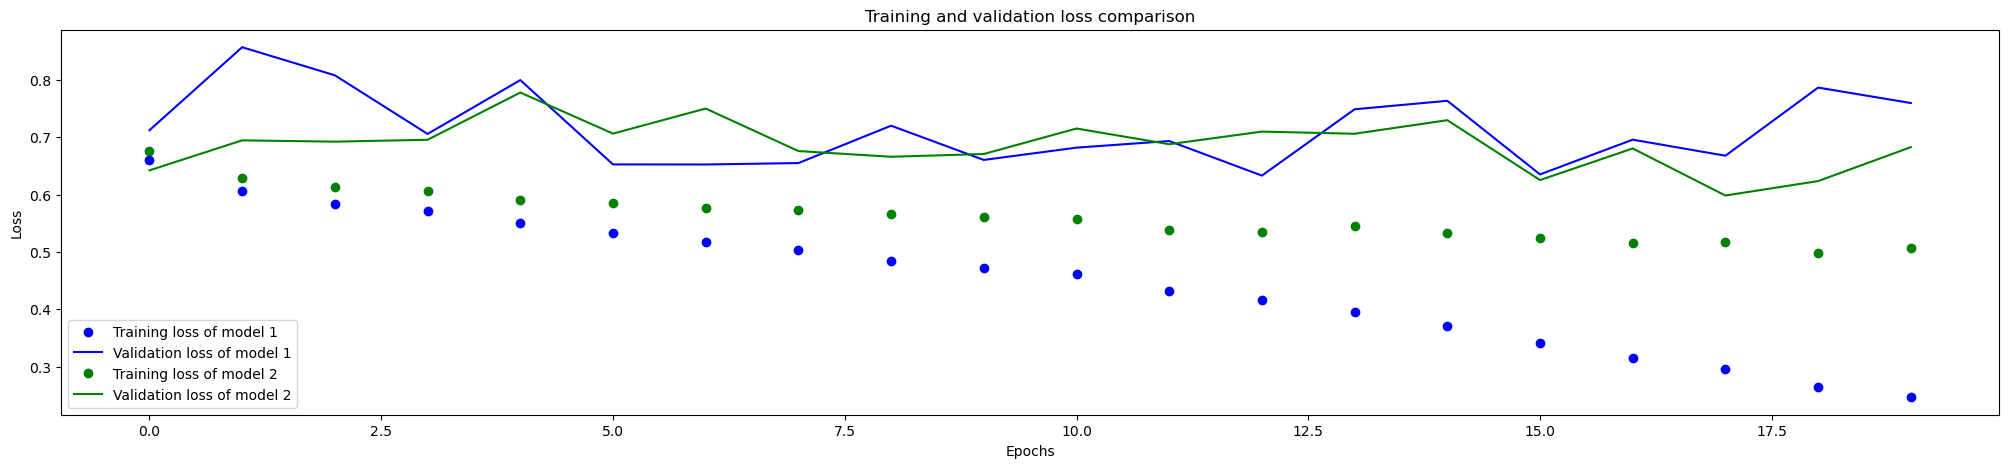

In [54]:
PlotMultipleLossComparison(models_loss, models_val_loss, epoch_limit=20)

### Po augmentacji danych rozbieżność między `accuracy` na zbiorze treningowym oraz walidacyjnym się zmniejszyła. Augmentacja została wykonana dla zbioru testowego, dlatego wartości dla zbioru walidacyjnego są podobne. 

#### Ewaluacja modelu na zbiorze testowym

In [55]:
result1 = model1.evaluate(test_generator)
dict(zip(model1.metrics_names, result1))

33/33 [==============================] - 3s 78ms/step - loss: 0.5481 - acc: 0.7376


{'loss': 0.54807448387146, 'acc': 0.7375776171684265}

In [32]:
model1.save(models_dir + 'hotdog_nothotdog_1_augmented.h5')

## Model 2

In [62]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(512, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [63]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 35, 35, 256)     

In [64]:
# Learning on the augmented data, slightly increase number of images processed per epoch
history2 = model2.fit(
      train_generator,
      steps_per_epoch=125,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/20
125/125 [==============================] - 58s 454ms/step - loss: 0.6747 - acc: 0.5632 - val_loss: 0.6638 - val_acc: 0.6460
Epoch 2/20
125/125 [==============================] - 56s 443ms/step - loss: 0.6368 - acc: 0.6352 - val_loss: 0.6665 - val_acc: 0.6480
Epoch 3/20
125/125 [==============================] - 55s 438ms/step - loss: 0.6168 - acc: 0.6628 - val_loss: 0.6421 - val_acc: 0.6660
Epoch 4/20
125/125 [==============================] - 56s 444ms/step - loss: 0.6060 - acc: 0.6772 - val_loss: 0.6575 - val_acc: 0.6640
Epoch 5/20
125/125 [==============================] - 56s 442ms/step - loss: 0.5963 - acc: 0.6876 - val_loss: 0.8826 - val_acc: 0.6120
Epoch 6/20
125/125 [==============================] - 56s 443ms/step - loss: 0.5803 - acc: 0.7016 - val_loss: 0.7153 - val_acc: 0.6840
Epoch 7/20
125/125 [==============================] - 55s 441ms/step - loss: 0.5681 - acc: 0.7140 - val_loss: 0.6420 - val_acc: 0.6900
Epoch 8/20
125/125 [==============================] - 5

#### Ewaluacja modelu na zbiorze testowym

In [68]:
result2 = model2.evaluate(test_generator)
dict(zip(model2.metrics_names, result2))

33/33 [==============================] - 4s 124ms/step - loss: 0.6828 - acc: 0.7050


{'loss': 0.6827728152275085, 'acc': 0.7049689292907715}

Zapisujemy model 2

In [65]:
model2.save(models_dir + 'hotdog_nothotdog_2.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

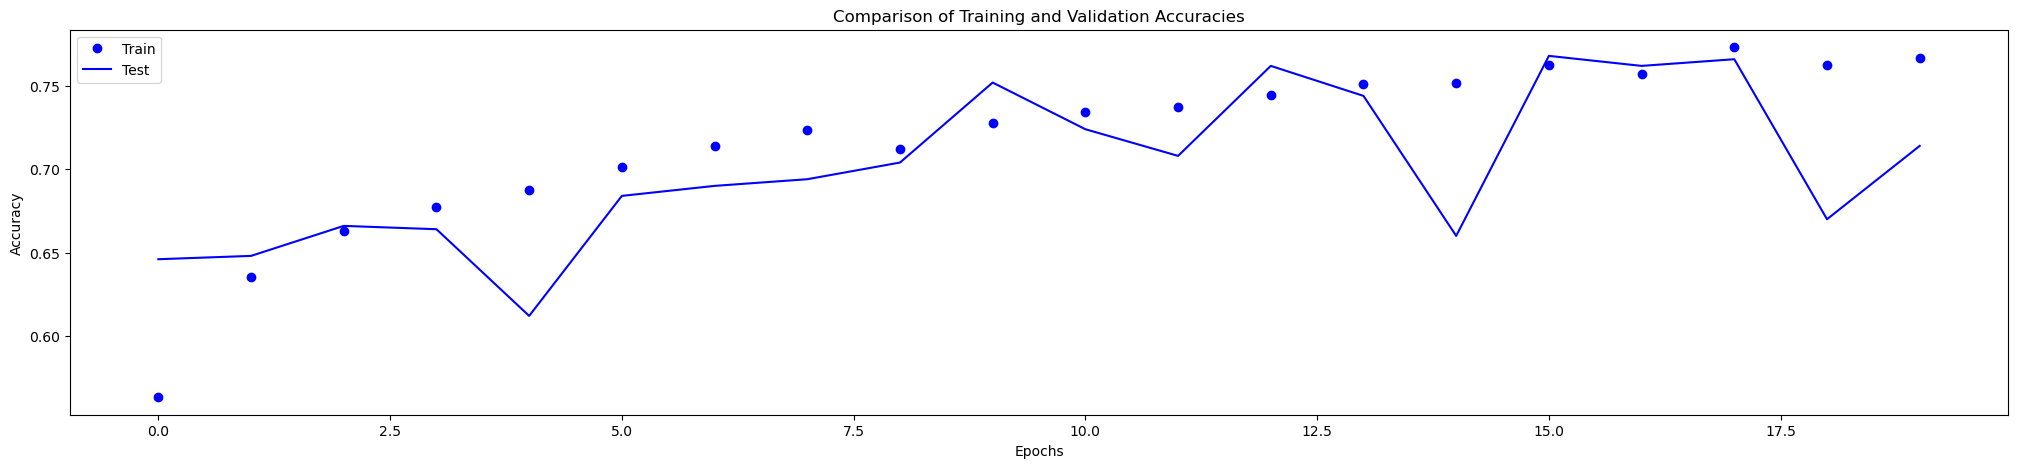

<Figure size 640x480 with 0 Axes>

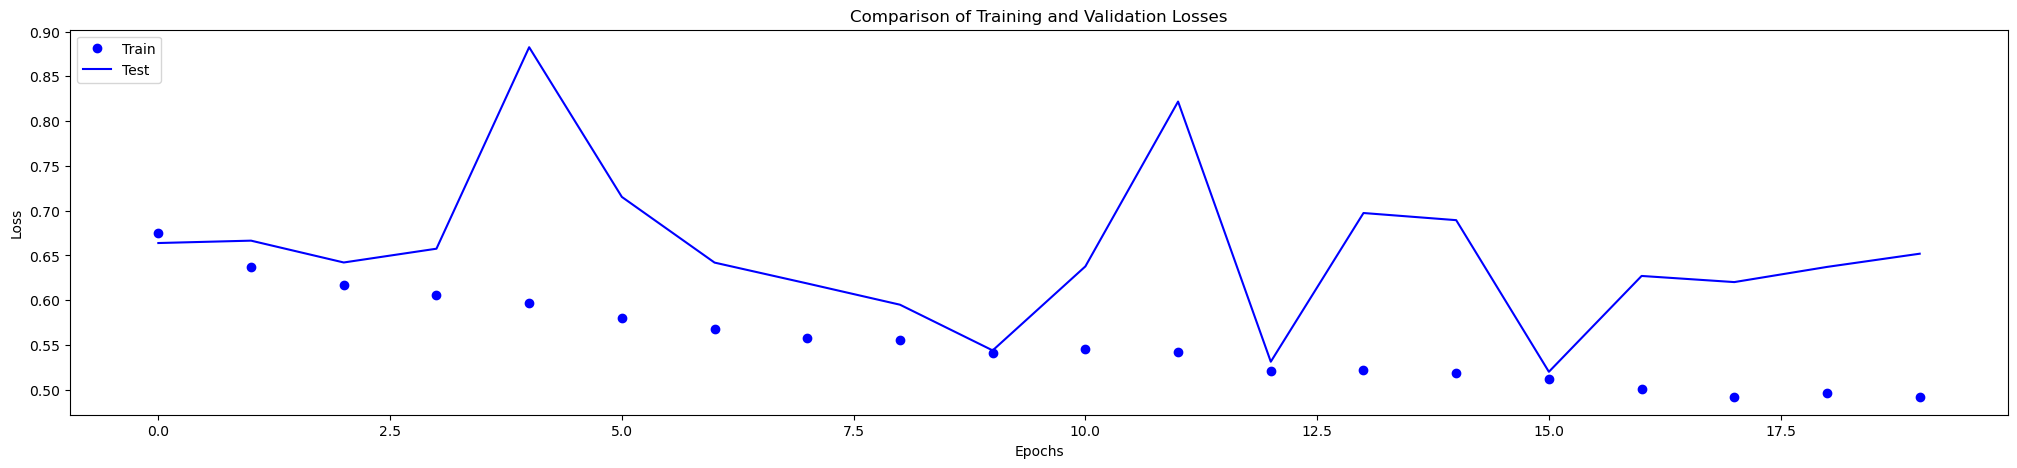

In [69]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

models_acc.append(acc2)
models_val_acc.append(val_acc2)
models_loss.append(loss2)
models_val_loss.append(val_loss2)

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')
PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

Dla tego modelu zauważyć można duże fluktuacje, zwłaszcza dla straty, które występują co kilka epok.

accs len: 20
epochs: range(0, 20)


<Figure size 640x480 with 0 Axes>

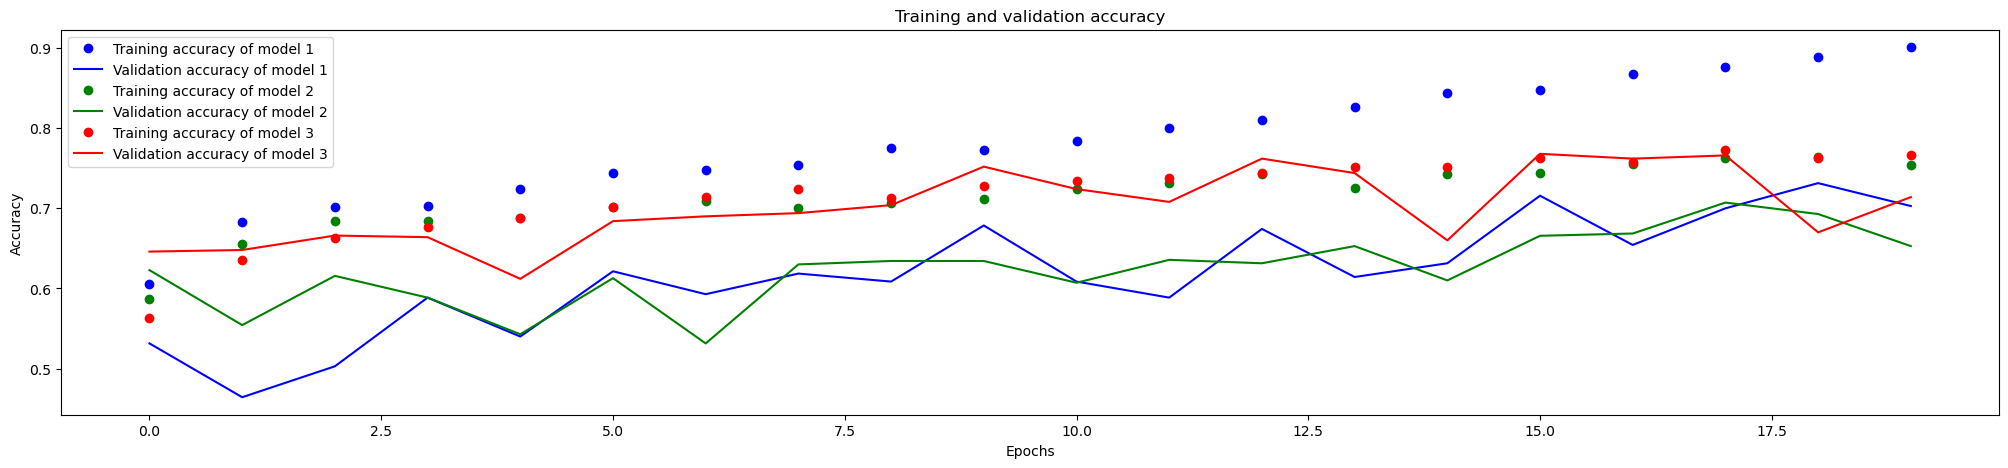

In [71]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=20)

<Figure size 640x480 with 0 Axes>

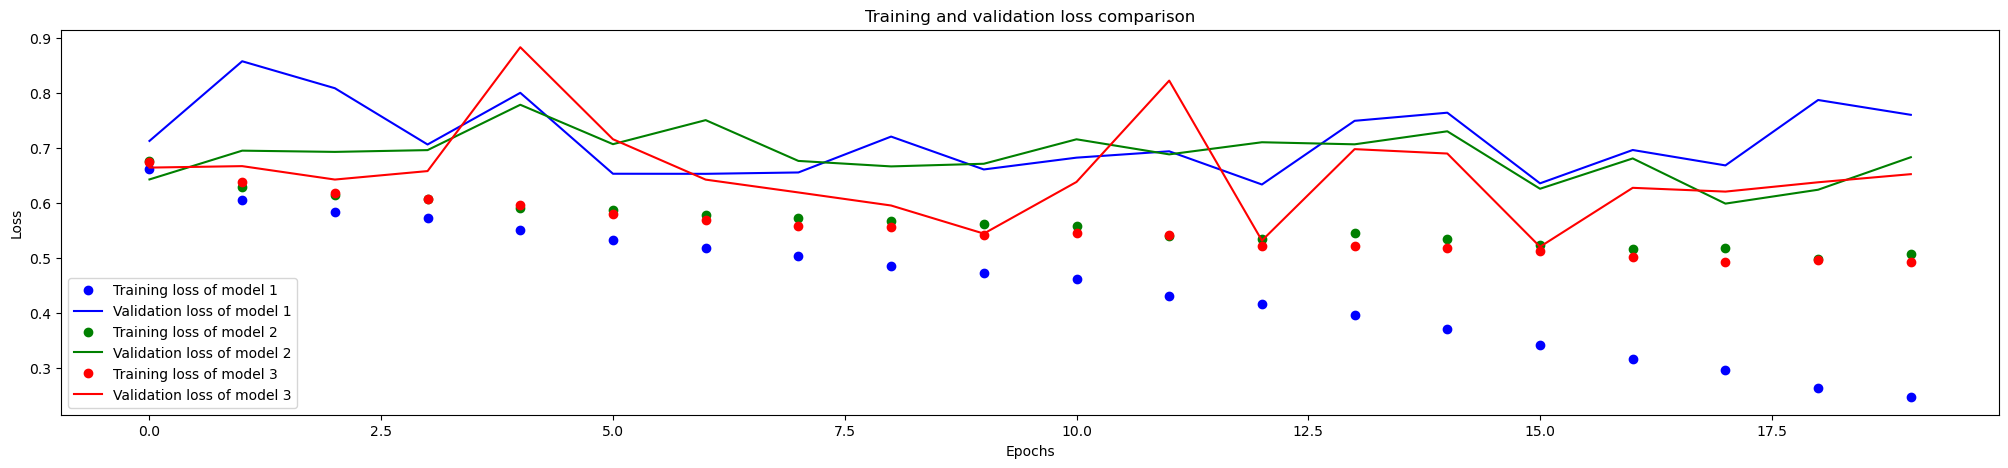

In [72]:
PlotMultipleLossComparison(models_loss, models_val_loss, epoch_limit=20)

#### Model 1 odznacza się lepszą dokładnością w ostatnich epokach - dla zbioru testowego też wykazał się lepszymi wynikami.Jednak przy zestawieniu modeli (`model 1 - model 1 bez augmentacji`, `model 2 - model 1 z augmentacją`, `model 3 - model 2 z augmentacją`) model 2 wypada lepiej od poprzedników w pierwszych epokach, w okolicach 20 epoki natomiast model 1 z augmentacją wypada podobnie.

## Model 2
Ten sam model, który został użyty poprzednio - tym razem w procesie uczenia zmniejszę rozmiar batchy i zwiększe ilość epok uczenia.

In [74]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(512, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [75]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 35, 35, 256)     

In [76]:
# Learning on the augmented data, slightly increase number of images processed per epoch
history2 = model2.fit(
      train_generator,
      steps_per_epoch=60,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=12)

Epoch 1/40
60/60 [==============================] - 28s 443ms/step - loss: 0.6923 - acc: 0.5333 - val_loss: 0.6658 - val_acc: 0.6417
Epoch 2/40
60/60 [==============================] - 27s 440ms/step - loss: 0.6610 - acc: 0.6058 - val_loss: 0.6844 - val_acc: 0.6042
Epoch 3/40
60/60 [==============================] - 27s 442ms/step - loss: 0.6418 - acc: 0.6467 - val_loss: 0.7537 - val_acc: 0.6083
Epoch 4/40
60/60 [==============================] - 27s 442ms/step - loss: 0.6304 - acc: 0.6550 - val_loss: 0.6660 - val_acc: 0.6542
Epoch 5/40
60/60 [==============================] - 27s 445ms/step - loss: 0.6344 - acc: 0.6350 - val_loss: 0.6630 - val_acc: 0.6292
Epoch 6/40
60/60 [==============================] - 28s 456ms/step - loss: 0.6217 - acc: 0.6483 - val_loss: 0.6602 - val_acc: 0.6625
Epoch 7/40
60/60 [==============================] - 27s 447ms/step - loss: 0.6143 - acc: 0.6642 - val_loss: 0.6873 - val_acc: 0.6333
Epoch 8/40
60/60 [==============================] - 27s 444ms/step - 

#### Ewaluacja modelu na zbiorze testowym

In [77]:
result2 = model2.evaluate(test_generator)
dict(zip(model2.metrics_names, result2))

33/33 [==============================] - 4s 124ms/step - loss: 0.7513 - acc: 0.6708


{'loss': 0.7513105869293213, 'acc': 0.6708074808120728}

Zapisujemy model 2

In [78]:
model2.save(models_dir + 'hotdog_nothotdog_2_v2.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

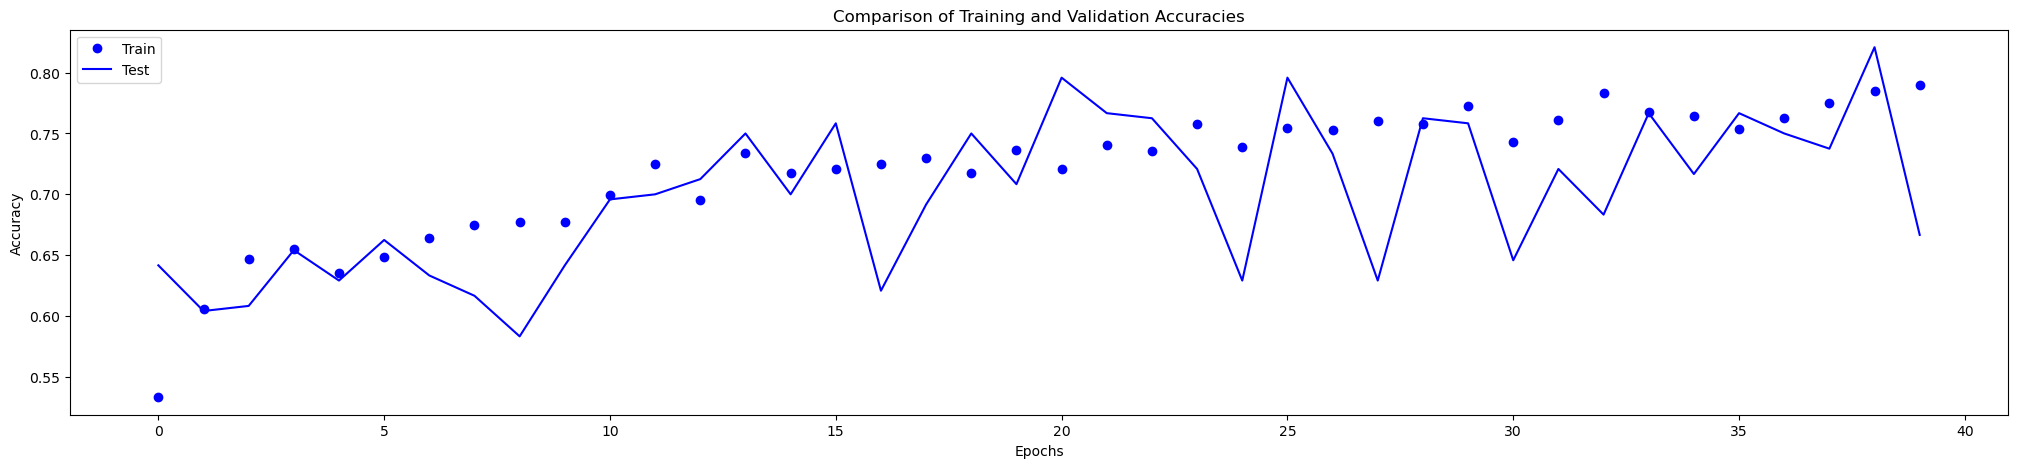

<Figure size 640x480 with 0 Axes>

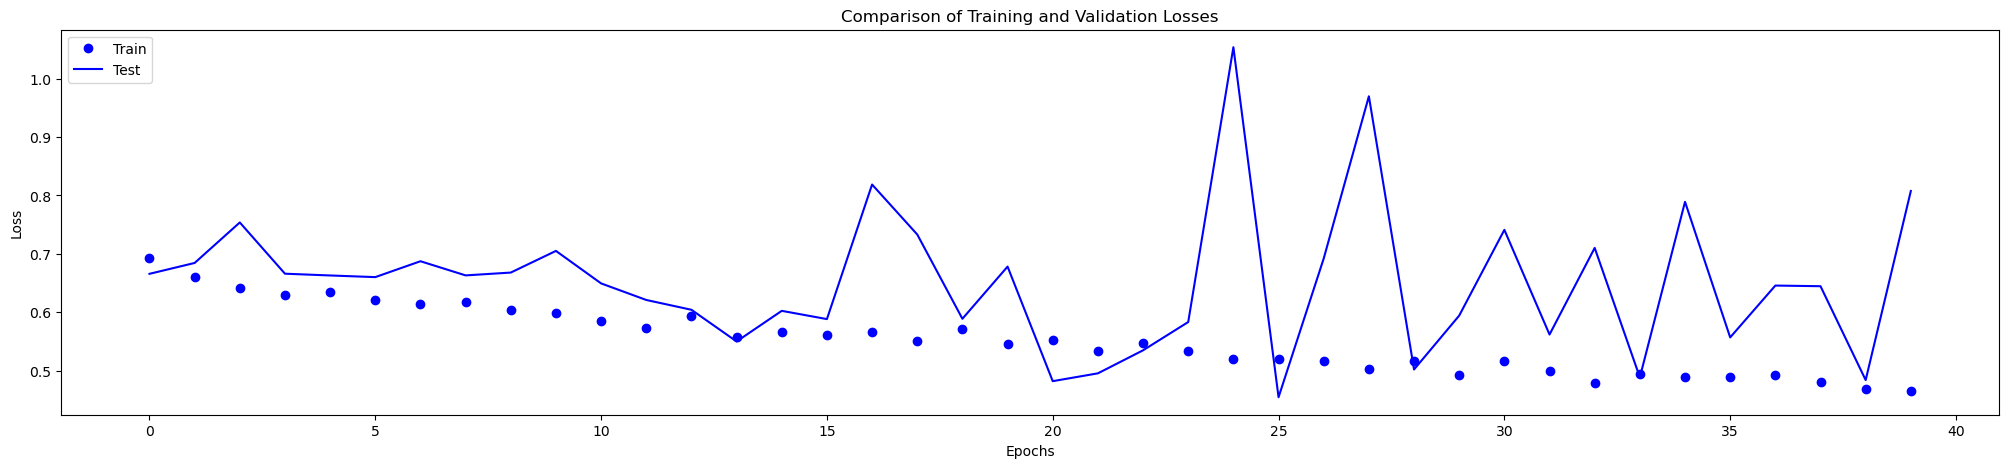

In [79]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

models_acc.append(acc2)
models_val_acc.append(val_acc2)
models_loss.append(loss2)
models_val_loss.append(val_loss2)

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')
PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

Model 1 odznacza się lepszą dokładnością i mniejszą stratą na zbiorze testowym. Dodatkowo dla modelu 2 zauważyć można duże fluktuacje, które występują co kilka epok.

accs len: 20
epochs: range(0, 40)


<Figure size 640x480 with 0 Axes>

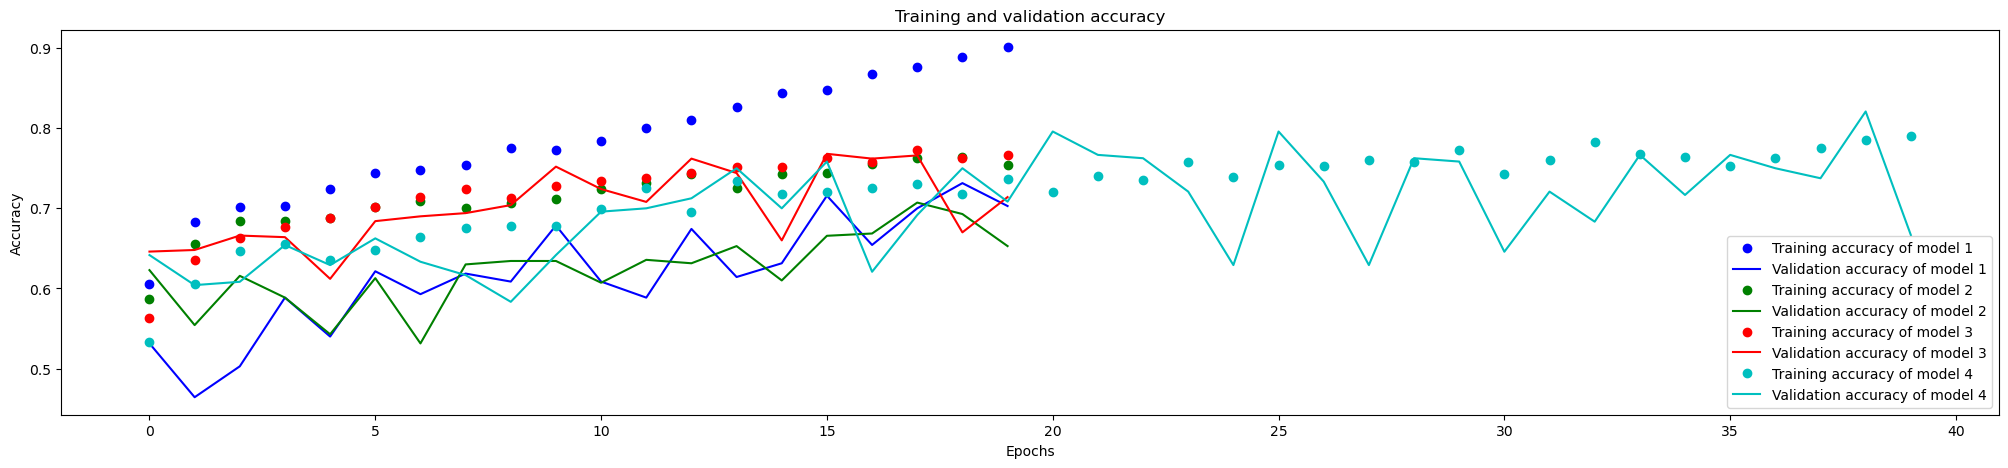

In [80]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=40)

<Figure size 640x480 with 0 Axes>

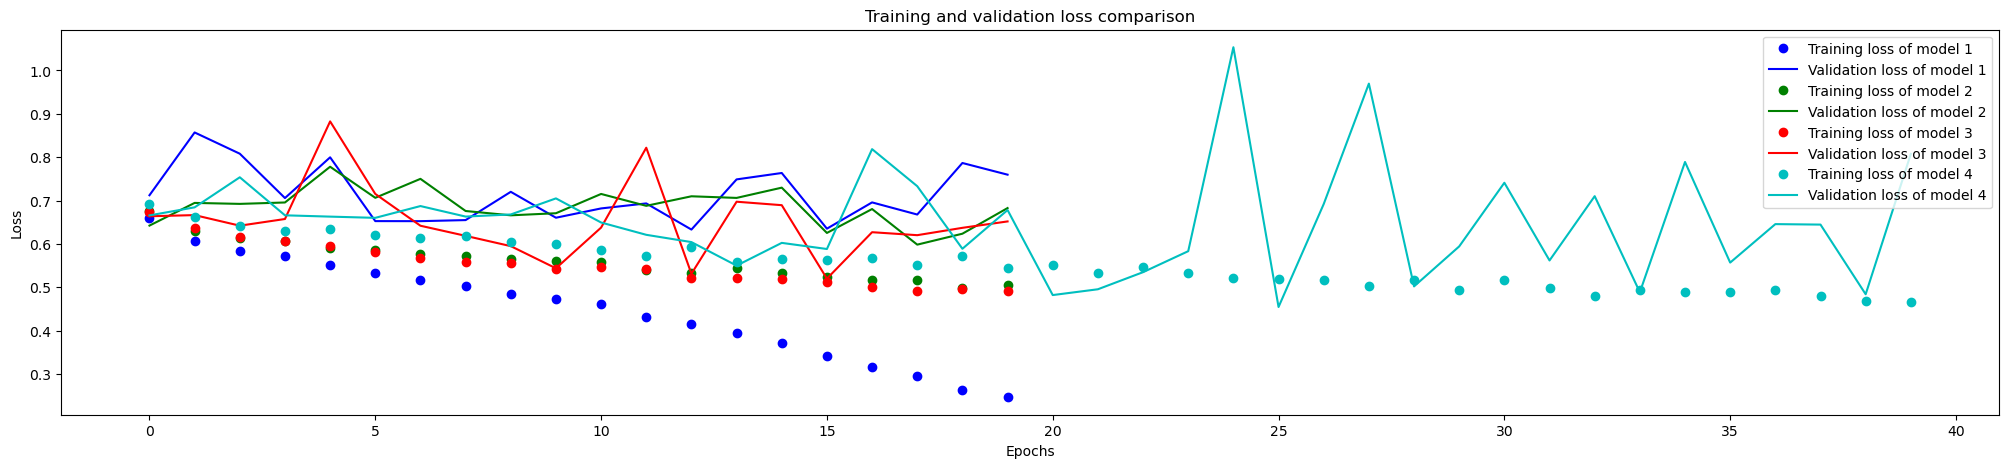

In [81]:
PlotMultipleLossComparison(models_loss, models_val_loss, epoch_limit=40)

## Model 4 (`optimizer=Adam`)
Nierzadko wybieranym typem optimizera w CNN jest Adam, czasem występuje też SGD, więc w kolejnych modelach sprawdzę czy przyniosą zauważalne rezultaty.

In [82]:
model4 = models.Sequential()
model4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(512, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [83]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 35, 35, 256)     

In [84]:
# Learning on the augmented data, slightly increase number of images processed per epoch
history4 = model4.fit(
      train_generator,
      steps_per_epoch=60,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=12)

Epoch 1/40
60/60 [==============================] - 28s 440ms/step - loss: 0.6937 - acc: 0.5258 - val_loss: 0.6926 - val_acc: 0.4708
Epoch 2/40
60/60 [==============================] - 26s 432ms/step - loss: 0.6878 - acc: 0.5400 - val_loss: 0.6679 - val_acc: 0.6042
Epoch 3/40
60/60 [==============================] - 27s 439ms/step - loss: 0.6319 - acc: 0.6383 - val_loss: 0.7245 - val_acc: 0.5917
Epoch 4/40
60/60 [==============================] - 26s 435ms/step - loss: 0.6361 - acc: 0.6400 - val_loss: 0.6624 - val_acc: 0.6542
Epoch 5/40
60/60 [==============================] - 27s 436ms/step - loss: 0.6335 - acc: 0.6475 - val_loss: 0.6456 - val_acc: 0.6458
Epoch 6/40
60/60 [==============================] - 27s 439ms/step - loss: 0.6326 - acc: 0.6383 - val_loss: 0.7465 - val_acc: 0.5958
Epoch 7/40
60/60 [==============================] - 27s 440ms/step - loss: 0.6378 - acc: 0.6425 - val_loss: 0.6734 - val_acc: 0.6083
Epoch 8/40
60/60 [==============================] - 26s 431ms/step - 

#### Ewaluacja modelu na zbiorze testowym

In [85]:
result4 = model4.evaluate(test_generator)
dict(zip(model4.metrics_names, result4))

33/33 [==============================] - 4s 124ms/step - loss: 0.6532 - acc: 0.6925


{'loss': 0.6531851291656494, 'acc': 0.6925466060638428}

In [86]:
model4.save(models_dir + 'hotdog_nothotdog_4.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

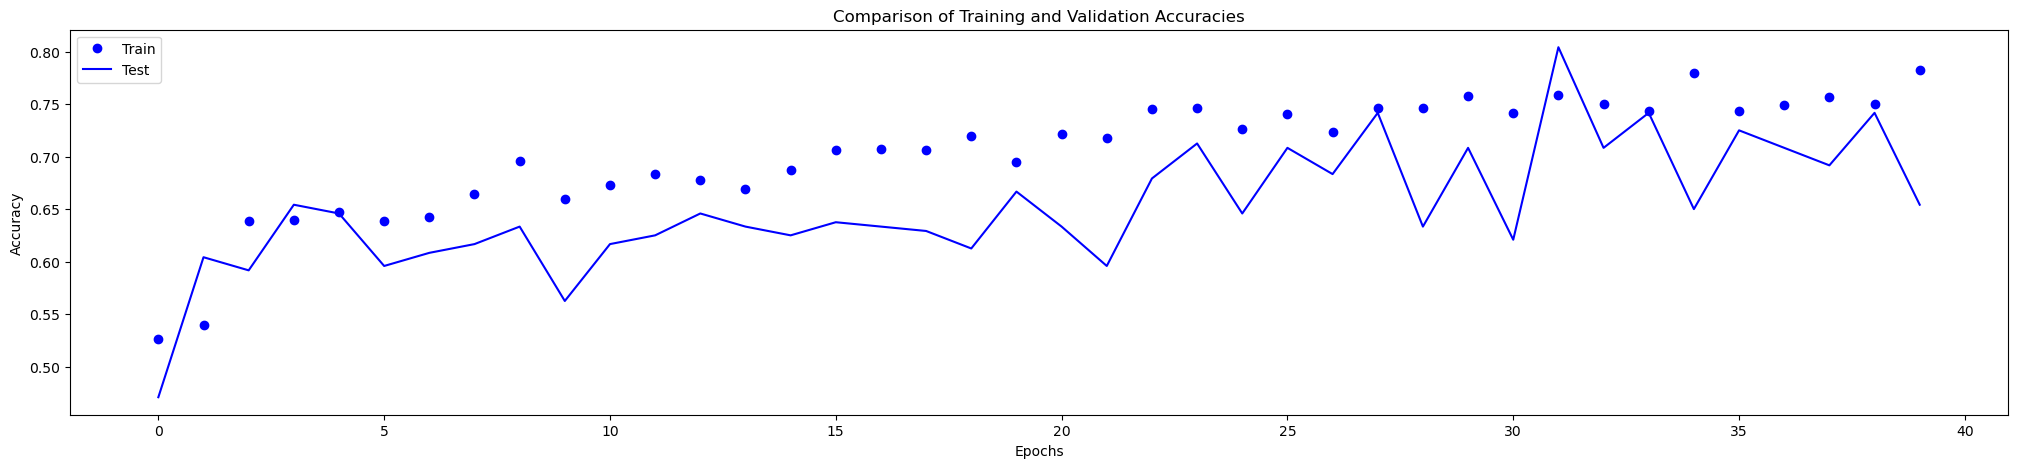

<Figure size 640x480 with 0 Axes>

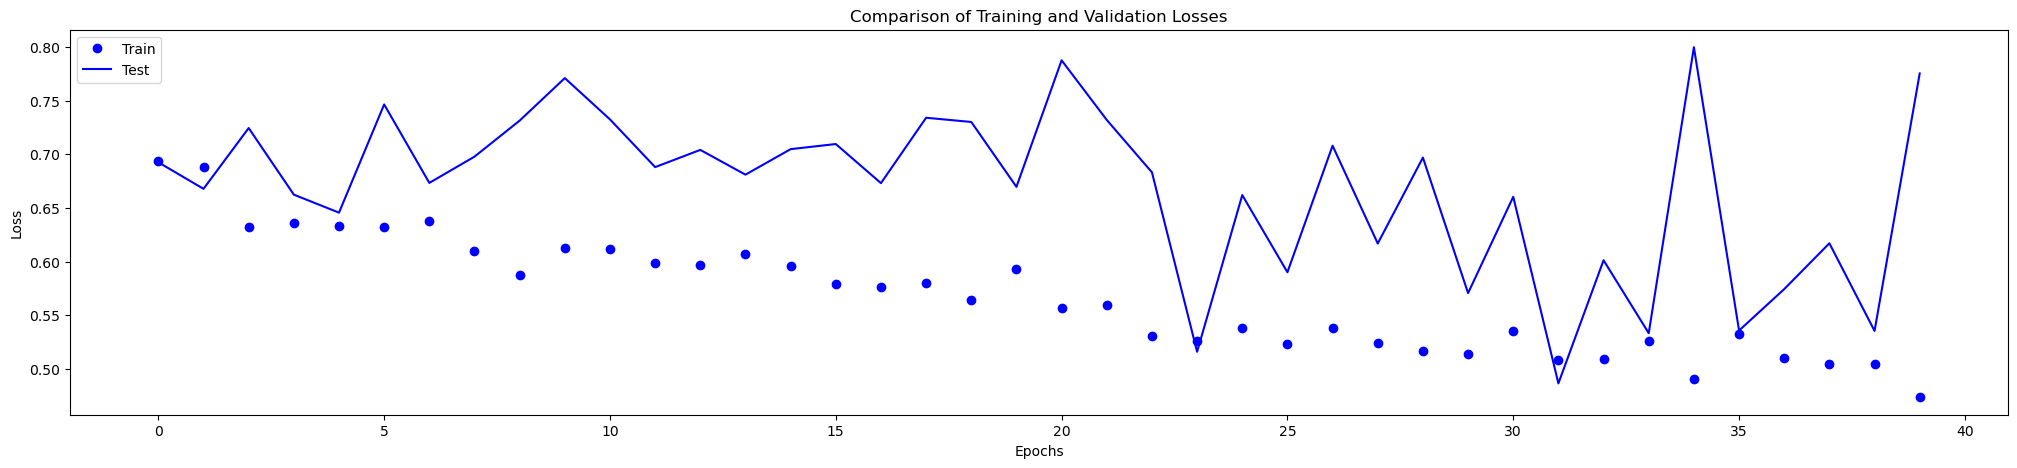

In [87]:
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

models_acc.append(acc4)
models_val_acc.append(val_acc4)
models_loss.append(loss4)
models_val_loss.append(val_loss4)

PlotAccuracyComparison(acc4, val_acc4, lab = 'Model 4')
PlotLossComparison(loss4, val_loss4, lab = 'Model 4')

accs len: 20
epochs: range(0, 40)


<Figure size 640x480 with 0 Axes>

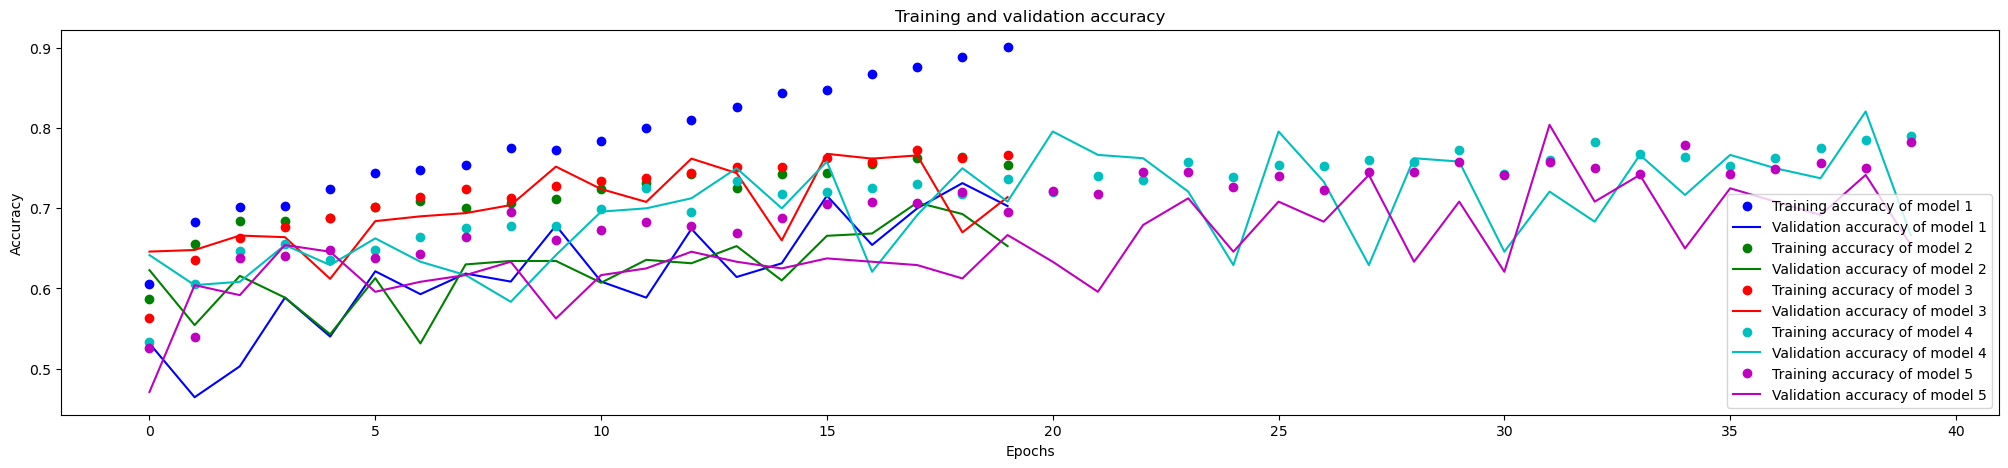

In [88]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=40)

<Figure size 640x480 with 0 Axes>

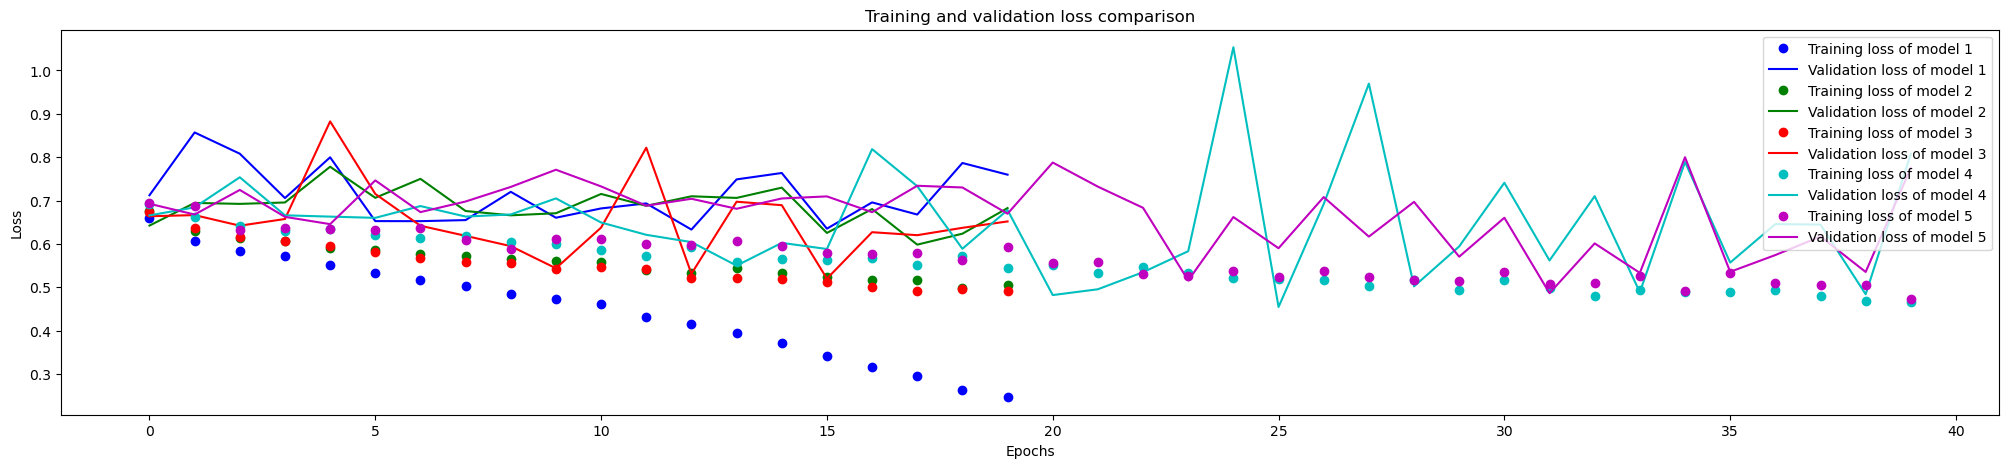

In [89]:
PlotMultipleLossComparison(models_loss, models_val_loss, epoch_limit=40)

Wszystkie modele nie odbiegają znacznie od siebie, nie widać też znacznej poprawy w działaniu przy modyfikacji parametrów `optimizer` lub zmiany ilości epok oraz rozmiarów `batch` przy uczeniu. Najlepszym do tej pory jest model 3, który daje na zbiorze testowym wynik 70% dokładności - nie jest to rewelacyjny wynik, lecz może mieć na to wpływ też nieprosty dataset, na którym nie jest łatwo uczyć sieć.

Wyszukując informacje o uczeniu sieci do klasyfikacji w oparciu o wykorzystany tutaj dataset napotkałem się na posty/artykuły, w których na prostych modelach otrzymywano wyniki podobne do tych które otrzymane zostały powyżej, natomiast duża poprawa (accuracy na poziomie ponad 93%) wystąpiło przy użyciu uczenia transferowego przy użyciu sieci takich jak `ResNet34`, `VGG19` lub `Inception ResNet V2`.

### Nauka w oparciu o wstępnie przyuczony model

In [130]:
base_model_vgg19 = tf.keras.applications.vgg19.VGG19(weights = 'imagenet', include_top = False, input_shape = (299,299,3))
base_model_vgg19.trainable = False

In [131]:
base_model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0     

In [132]:
model5 = models.Sequential()
for layer in base_model_vgg19.layers:
    model5.add(layer)
model5.add(layers.GlobalAveragePooling2D())
model5.add(layers.Flatten())
model5.add(layers.Dense(1024, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

In [133]:
model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 74, 74, 256)     

In [134]:
model5.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [135]:
# Learning on the augmented data
history5 = model5.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/20
100/100 [==============================] - 92s 910ms/step - loss: 0.6539 - acc: 0.6355 - val_loss: 0.6564 - val_acc: 0.6080
Epoch 2/20
100/100 [==============================] - 93s 924ms/step - loss: 0.5967 - acc: 0.7220 - val_loss: 0.6329 - val_acc: 0.6220
Epoch 3/20
100/100 [==============================] - 93s 926ms/step - loss: 0.5586 - acc: 0.7440 - val_loss: 0.6181 - val_acc: 0.6260
Epoch 4/20
100/100 [==============================] - 92s 914ms/step - loss: 0.5291 - acc: 0.7600 - val_loss: 0.6279 - val_acc: 0.6540
Epoch 5/20
100/100 [==============================] - 91s 907ms/step - loss: 0.5212 - acc: 0.7620 - val_loss: 0.6036 - val_acc: 0.6540
Epoch 6/20
100/100 [==============================] - 91s 903ms/step - loss: 0.5043 - acc: 0.7750 - val_loss: 0.6150 - val_acc: 0.6640
Epoch 7/20
100/100 [==============================] - 91s 903ms/step - loss: 0.4935 - acc: 0.7670 - val_loss: 0.5914 - val_acc: 0.6880
Epoch 8/20
100/100 [==============================] - 9

#### Ewaluacja modelu na zbiorze testowym

In [136]:
result5 = model5.evaluate(test_generator)
dict(zip(model5.metrics_names, result5))

33/33 [==============================] - 26s 765ms/step - loss: 0.4398 - acc: 0.7950


{'loss': 0.4398070275783539, 'acc': 0.7950310707092285}

Model oparty o wstępnie przyuczoną sieć `VGG19` radzi sobie o wiele lepiej niż dotychczas zbudowane modele. Dokładność na zbiorze testowym wynosi prawie `80%` (poprawa o 10% względem poprzednich modeli), `loss` wynosi `ok. 0.44` (poprawa o ok. 0.20). Świadczy to o tym, że przy bardziej skomplikowanych rozwiązaniach, gdy uczenie trwa długi czas, posiadana moc obliczeniowa nie jest wystarczająca do uczenia bardziej rozbudowanych sieci lub gdy posiadamy małą ilość danych, warto sprawdzić jak spawdzi się uczenie transferowe.

In [139]:
model5.save(models_dir + 'hotdog_nothotdog_5_pretrained.h5')

<Figure size 640x480 with 0 Axes>

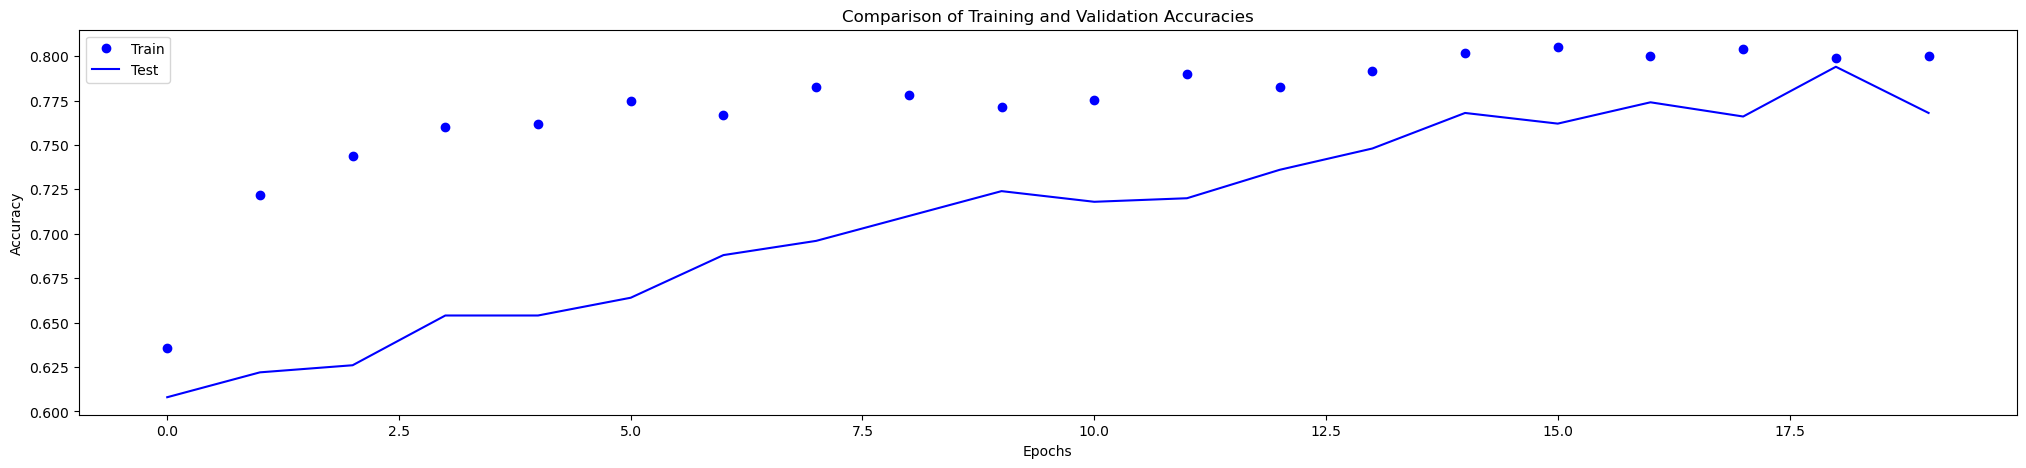

<Figure size 640x480 with 0 Axes>

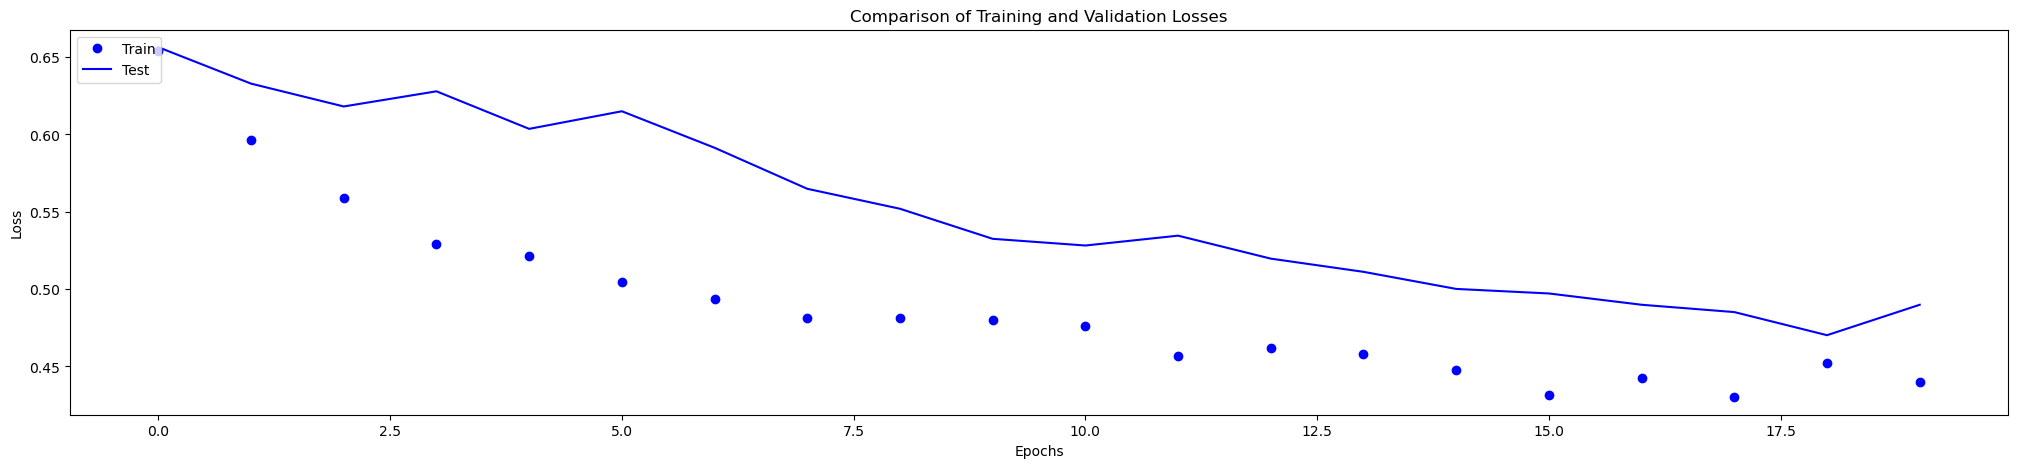

In [137]:
acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

models_acc.append(acc5)
models_val_acc.append(val_acc5)
models_loss.append(loss5)
models_val_loss.append(val_loss5)

PlotAccuracyComparison(acc5, val_acc5, lab = 'Model 5')
PlotLossComparison(loss5, val_loss5, lab = 'Model 5')

#### Kilka predykcji modelu

In [176]:
def create_test_gen():
    test_generator = test_datagen.flow_from_directory(
        # This is the target directory
        test_dir,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        # The size of baches of images
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
    return test_generator

test_generator = create_test_gen()

Found 644 images belonging to 2 classes.


In [177]:
predictions = model5.predict(test_generator)

33/33 [==============================] - 23s 721ms/step


In [178]:
test_generator = create_test_gen()

Found 644 images belonging to 2 classes.


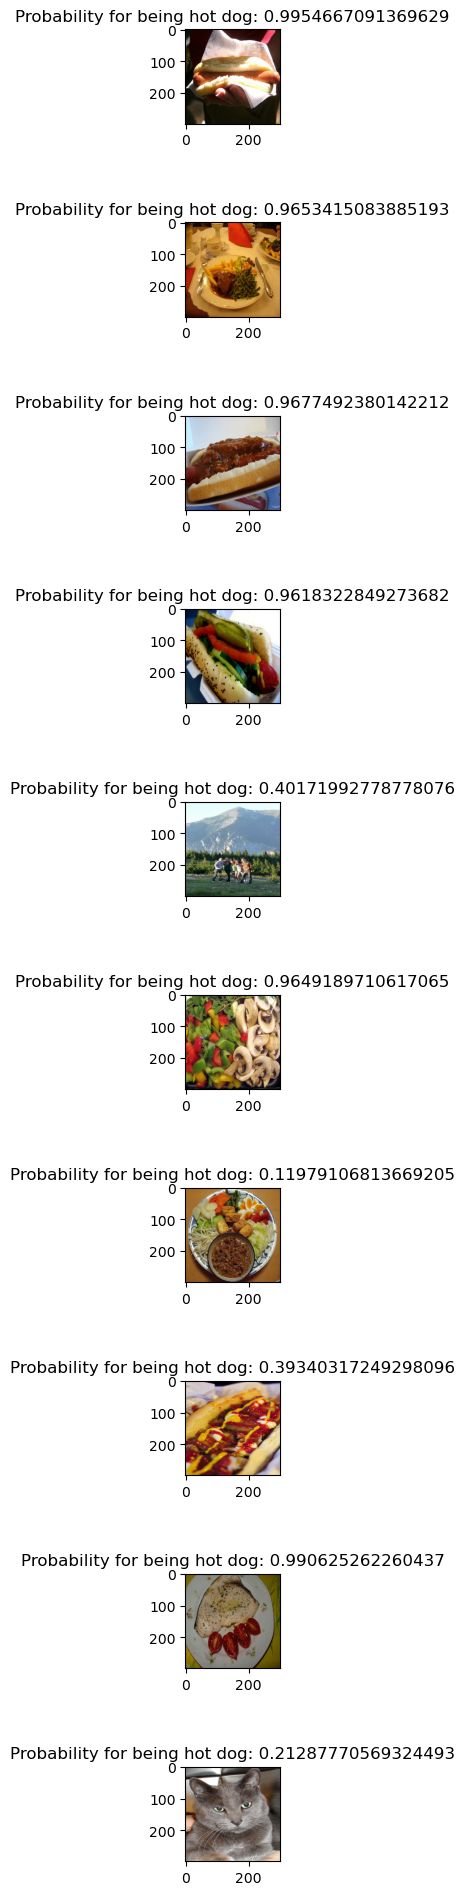

In [179]:
fig, axs = plt.subplots(10, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, p in enumerate(predictions[:10]):
    index=np.argmax(p)
    prob=p[index]
    img, label = test_generator.next()
    axs[i].set_title(f'Probability for being hot dog: {prob}')
    axs[i].imshow(img[0])
